**Autor**: Carlos Alberto C. da Purificação (geofisico2007@gmail.com)


\begin{equation}
\frac{\partial^2 u}{\partial t^2} = c^{2}\left ( \frac{\partial^2 u}{\partial x^2} +\frac{\partial^2 u}{\partial y^2} \right )
\end{equation}


$t$ é o tempo, $u$ é o deslocamento, $c$ é a velocidade de propagação da onda no meio, x e y são as coordenadas cartesianas. O programa abaixo exibe a propagação de ondas em um domínio bidimensional(2D), através da solução numérica da equação de onda. O __Método de Diferenças Finitas__ em duas dimensões com termo transiente será utilizado. O domínio será um quadrado com dimensões de 1 m x 1 m, de modo que: sua discretização será dada com: 

  - $dt << 0,01s$ , de modo que a variável $u$ será definida no contorno como:
  - $u(x=0) = sen(10*t)*sen(y*\pi)$;
  - $u(x=1) = 0$; 
  - $u(y=0) = 0$; 
  - $u(y=1) = 0$; 

# Desafio para participar do Aceleradev Data Science da Codenation em abril de 2020

Neste notebook, vamos prever as notas de matemática dos estudantes que fizeram a prova do ENEM de 2016, em função de alguns atributos dados.

__Objetivo do desafio:__ Gerar um modelo a partir dos dados de treino e fazer a predição das notas de matemática (`NU_NOTA_MT`) no dado de teste, de modo que não temos a variável `NU_NOTA_MT` no dado de teste, para podermos inferir se nosso modelo ficou realmente bom em dados "não vistos". Após, enviar o resultado para a Codenation em um arquivo answer.csv com duas colunas: `NU_INSCRICAO` e `NU_NOTA_MT` (nota de matemática predita)! Eles detêm a da nota verdadeira e fazem a avaliaçao da nossa nota predita com a nota verdadeira, atribuindo-nos uma nota percental, que creio eu, varie de 0 à 100.

Neste desafio mostrarei manobras para a EDA (Exploratory Data Analysis), além da transformação das variáveis categóricas em numéricas (que dependerá de serem nominais ou ordinais) e quantitativas discretas. Após, serão aplicados dois algoritmos poderosíssimos:

- *Random Forest*
- *Extreme Gradient Boosting (XGboost)*
 - Esse algoritmo me proporcionou um score de 94% (dado pela Codenation), me colocando dentro do Aceleradev Data Science

## Requisitos

Você precisará de python 3.6 (ou superior) e do gerenciador de pacotes pip.

Para instalar os requisitos, execute o comando como no exemplo abaixo:

    
```bash
$ pip install -r requirements.txt
```

## Detalhes

O contexto do desafio gira em torno dos resultados do ENEM 2016 (disponíveis no arquivo train.csv). Qualquer dúvida a respeito das colunas, consulte o arquivo __Dicionario_Microdados_Enem_2016.xlsx__, no folder __datasets__.

<IPython.core.display.Javascript object>


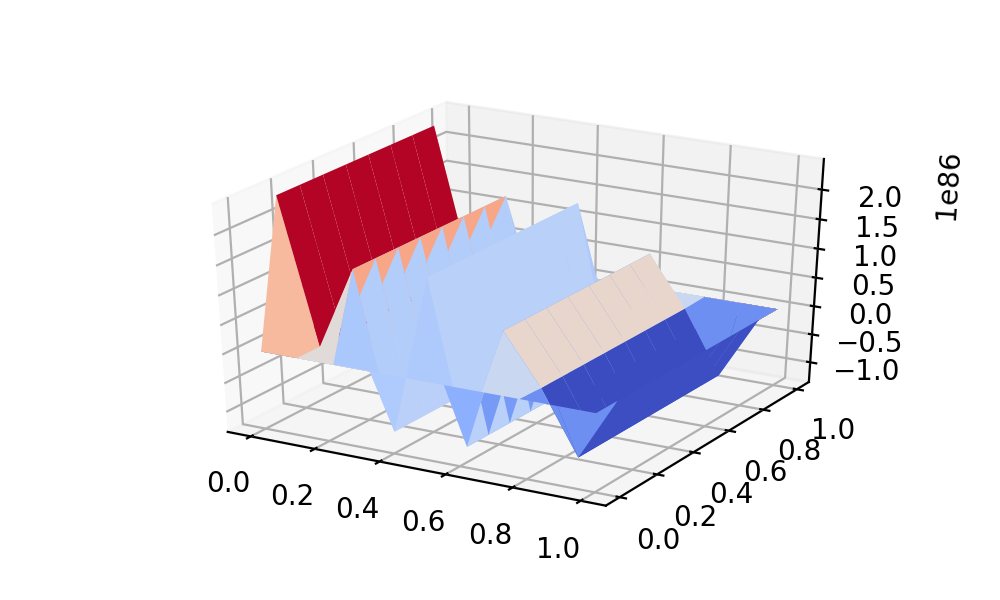

In [3]:
import time
import psutil
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib notebook
plt.rcParams['animation.html'] = 'jshtml'
fig = plt.figure(figsize=(5, 3), dpi=200)
ax = fig.gca(projection='3d')
fig.show()

In [4]:
a = int(input('Entre com o nº de nós da malha quadrada. Ex: se quer uma malha com 2 X 2 nós, digite 2: '))
nx = a
ny = a
c = 1
dx = 2 / (nx - 1)
dy = 2 / (ny - 1)
sigma = .001
dt = sigma * dx
x = np.linspace(0, 1, nx)
y = np.linspace(0, 1, ny)

nt=1
u = np.ones((nx, ny))
u[x == 0] = np.sin(10*nt)*np.sin(y*(np.pi))
u[x == 1] = 0
u[y == 0] = 0

while nt <=20:
    
    for n in range(nt + 1):
        un = u.copy()
        row, col = u.shape
        for i in range(1, row-1):
            for j in range(1, col-1):
                u[i+1, j] = (2*un[i,j] - un[i-1,j] + 
                (c**2)*(dt**2/dx**2*(un[i+1,j] - 2*un[i,j] + un[i-1,j]) + 
                dt**2/dy**2*(un[i,j+1] - 2*un[i,j] + un[i,j-1])))
            
                u[0, :] = (2*un[i,j] - un[i-1,j] + 
                (c**2)*(dt**2/dx**2*(un[i+1,j] - 2*un[i,j] + un[i-1,j]) + 
                dt**2/dy**2*(un[i,j+1] - 2*un[i,j] + un[i,j-1])))
            
                u[-1,:] = 0
                u[:, 0] = 0
                u[:,-1] = 0
                
    X, Y = np.meshgrid(x, y)
    fig.canvas.draw()
    time.sleep(1)
    nt += 1
    mode2 = ax.plot_surface(X, Y, u[:].T, cmap=cm.coolwarm)

Entre com o nº de nós da malha quadrada. Ex: se quer uma malha com 2 X 2 nós, digite 2: 10
